## Analisi de Componentes principales, PCA


## Integrantes:

###    - Apolonio Cuevas Manuel Alberto
### - González López Martín



# Exploración de los datos.

Describe al conjunto de datos. ¿Cuántas variables lo integran (y de qué tipo)?, ¿cuántas observaciones?, ¿el conjunto de datos está completo o hay datos faltantes?. Muestra la distribución de las variables con gráficas adecuadas (histogramas, boxplots, ...), ¿hay datos atípicos?. ¿Cuál es la correlación entre las parejas variables?, ¿identificas variables duplicadas?. Nota, si encuentras variables repetidas, elimina los duplicados.

### Carga de los datos

In [1]:
import pandas as pd
CSV_PATH = './indicadores.csv'
HEAD_PATH = './Nombres.xls'

In [2]:
df = pd.read_csv(CSV_PATH)
df.head()

,MUN,T_SEX,TS_EXP_ALCOHOL,POB_TOT,SALDO_NETO_MIG,TS_ID,IM,IM_100,ASIST_ESC_MUJ,ASIST_ESC_HOM,...,C_GINI,RAZ_ING,REZ_SOC,POB,POB_EXT,POB_JOV,HAC_SIN,HAC_IRR,HAC,HOG_JEF_FEM
0,Aguascalientes,12.17,97.740304,797010,0.80,113.42,-1.7684,7.690,94.1,93.7,...,0.44,0.13,-1.5585,30.53,2.26,27.098154,75.988193,0.957785,23.054022,24.03
1,Calvillo,5.54,94.207182,54136,-1.24,120.07,-0.7540,19.152,91.7,88.9,...,0.38,0.13,-1.1019,61.36,7.24,26.067681,61.986605,1.960784,36.052610,22.88
2,Jesús María,5.02,89.366402,99590,7.28,52.21,-1.2622,13.411,92.9,92.0,...,0.42,0.14,-1.2965,45.34,6.08,26.545838,62.856881,2.388360,34.754758,17.49
3,Ensenada,31.49,91.042685,466814,3.07,1.29,-1.3605,12.299,93.1,92.9,...,0.45,0.11,-1.0618,36.11,5.70,27.801651,71.222589,2.076563,26.700848,25.87
4,Mexicali,19.53,100.659034,936826,1.66,2.99,-1.7544,7.849,95.4,94.9,...,0.44,0.12,-1.5479,30.15,2.64,25.986149,71.508504,1.293183,27.198313,25.42


In [3]:
nombres = pd.read_excel(HEAD_PATH)
nombres.head()

,COLUMNA,Unnamed: 1,DESCRIPCIÓN
0,mun_clv,NaN,Clave del municipio (los primeros dos dígitos ...
1,MUN,NaN,Nombre del municipio
2,TS_EXP_ALCOHOL,NaN,Expendios de alcohol (Expendios por cada 100 m...
3,POB_TOT,NaN,Población total
4,SALDO_NETO_MIG,NaN,Saldo neto migratorio en 2010 (pob_2010-pob_20...


In [4]:
nombres = nombres.drop(columns=['Unnamed: 1'])
nombres.columns = ['nombre', 'descripcion']
nombres.head()

,nombre,descripcion
0,mun_clv,Clave del municipio (los primeros dos dígitos ...
1,MUN,Nombre del municipio
2,TS_EXP_ALCOHOL,Expendios de alcohol (Expendios por cada 100 m...
3,POB_TOT,Población total
4,SALDO_NETO_MIG,Saldo neto migratorio en 2010 (pob_2010-pob_20...


creamos un dictionario con la descripcion

In [5]:
nombres_dict = dict(zip(nombres['nombre'], nombres['descripcion']))
nombres_dict

{'mun_clv': 'Clave del municipio (los primeros dos dígitos identifican al estado)',
 'MUN': 'Nombre del municipio',
 'TS_EXP_ALCOHOL': 'Expendios de alcohol (Expendios por cada 100 mil habitantes)',
 'POB_TOT': 'Población total',
 'SALDO_NETO_MIG': 'Saldo neto migratorio en 2010 (pob_2010-pob_2005-Nacimientos_2005_2010+Defunciones_2005_2010)/pob_2010',
 'TS_ID': 'Infraestuctura deportiva (número de unidades deportivas por cada 100 mil habitantes)',
 'T_SEX': 'Tasa de delitos sexuales (secretaría de seguridad pública 2011)',
 'T_SEC': 'Tasa de secuestros (secretaría de seguridad pública 2011)',
 'T_HOMIC': 'Tasa de homicidios (secretaría de seguridad pública 2011)',
 'T_PAT': 'Tasa de delitos patrimoniales (secretaría de seguridad pública 2011)',
 'T_LES': 'Tasa de delitos por lesiones dolosas (secretaría de seguridad pública 2011)',
 'T_ROB_COM': 'Tasa de delitos de robo común (secretaría de seguridad pública 2011)',
 'T_ACC': 'Tasa de muestres por accidentes de tranporte (INEGI 2010)'

### Cantidad de Columna y filas

In [6]:
print(f'Cantidad de columnas: {df.shape[1]}')
print(f'Cantidad de filas: {df.shape[0]}')

Cantidad de columnas: 33
Cantidad de filas: 247


separamos la etiqueta del conjunto de datos

### Tipo de variables de cada columna

In [8]:
column_types = pd.DataFrame(df.dtypes)
column_types.columns = ['tipo']
column_types.join(nombres.set_index('nombre'))

,tipo,descripcion
MUN,object,Nombre del municipio
T_SEX,float64,Tasa de delitos sexuales (secretaría de seguri...
TS_EXP_ALCOHOL,float64,Expendios de alcohol (Expendios por cada 100 m...
POB_TOT,int64,Población total
SALDO_NETO_MIG,float64,Saldo neto migratorio en 2010 (pob_2010-pob_20...
TS_ID,float64,Infraestuctura deportiva (número de unidades d...
IM,float64,índice de marginación (INMUJERES)
IM_100,float64,índice de marginación en porcentaje (INMUJERES)
ASIST_ESC_MUJ,float64,Asistencia escolar de mujeres
ASIST_ESC_HOM,float64,Asistencia escolar de hombres


## columnas con datos faltantes

In [9]:
df.isnull().sum()

,0
MUN,0
T_SEX,0
TS_EXP_ALCOHOL,0
POB_TOT,0
SALDO_NETO_MIG,0
TS_ID,0
IM,0
IM_100,0
ASIST_ESC_MUJ,0
ASIST_ESC_HOM,0


## Separar el conjunto de caracteristicas de la etiqueta

In [15]:
indicadores = df.drop(columns=['T_SEX'])
delitos_sexuales = df['T_SEX']

## Variables Categoricas

Exploremos primero la variable categorica MUN, dado que es el nombre del municipio,

In [16]:
df['MUN']

,MUN
0,Aguascalientes
1,Calvillo
2,Jesús María
3,Ensenada
4,Mexicali
...,...
242,Jerez
243,Pinos
244,Río Grande
245,Sombrerete


In [17]:
df['MUN'].unique().shape[0] == df.shape[0]

True

Como podemos ver por la cardinalidad de la categoria, solo tenemos un registro por cada municipio. No es de mucha utilidad la variable para un modelo de regresion


In [18]:
indicadores = indicadores.drop(columns=['MUN'])

## Variables numericas

### Matriz de correlacion

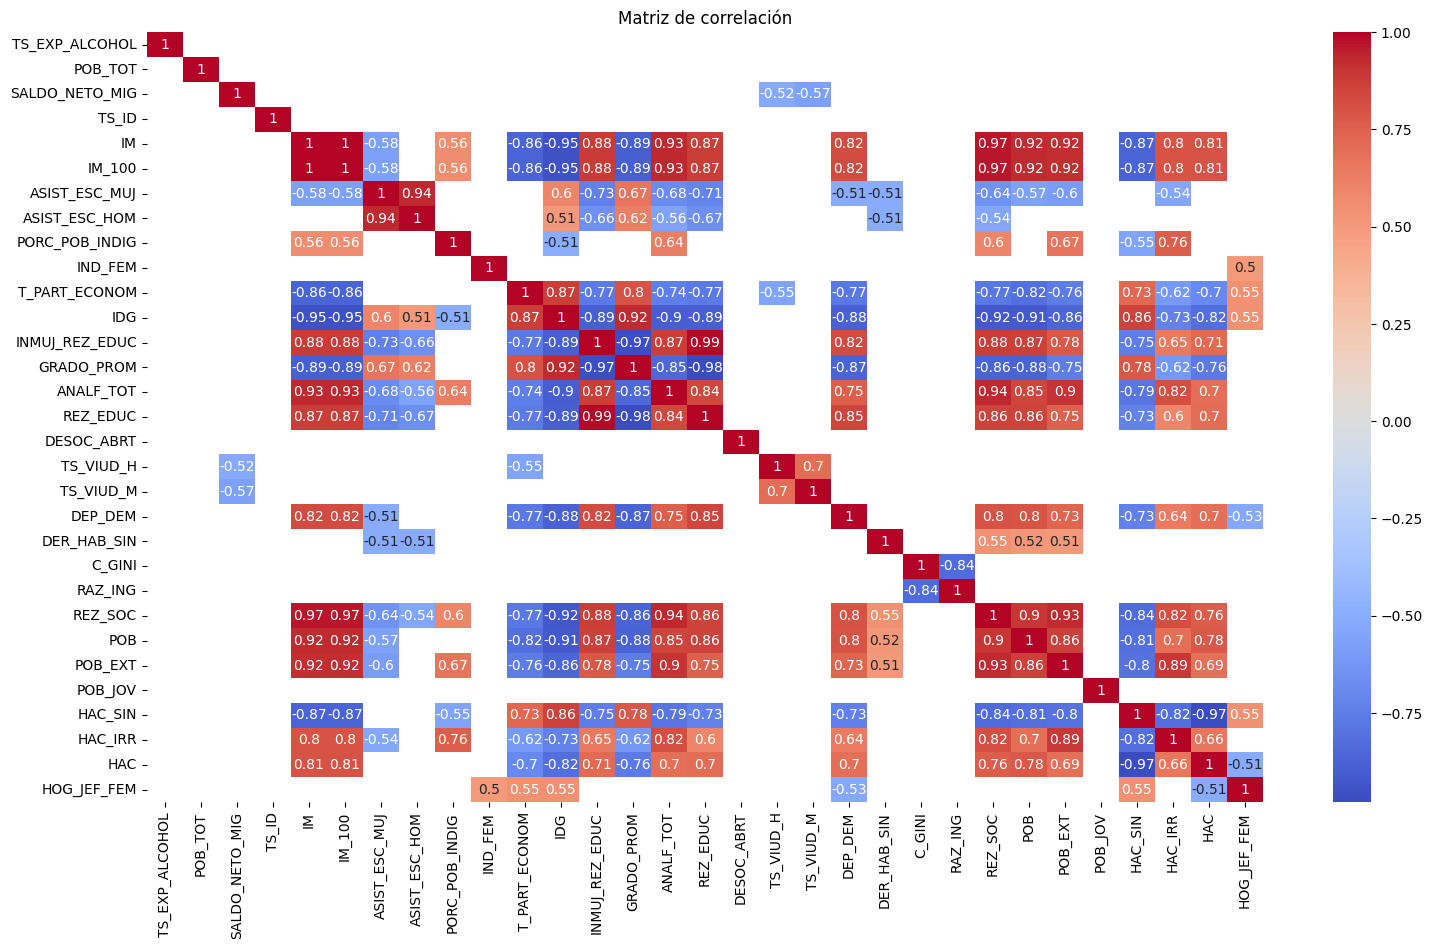

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
corr_matrix = indicadores.corr()

# definimos un umbral para la correlacion
threshold = 0.5

# Creamos un mask donde las correlaciones en valor absoluto sean menores al umbral
mask = corr_matrix.abs() < threshold

# Los valores menores al humbral los establecemos como None, para poder visualizar mejor
corr_matrix[mask] = None

#size of the figure:
plt.figure(figsize=(18,10))
# Graficamos el heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### IM e IM_100

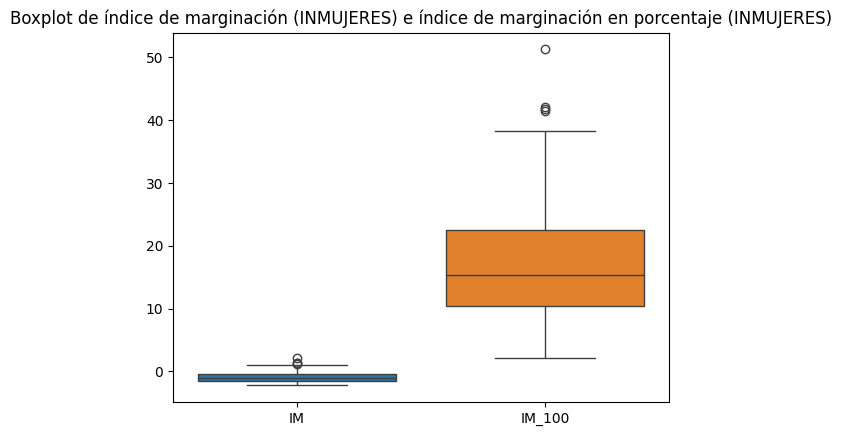

In [30]:
sns.boxplot(indicadores[['IM', 'IM_100']])
plt.title(f"Boxplot de {nombres_dict['IM']} e {nombres_dict['IM_100']}")
plt.show()

Es la misma vairable, asi que procedemos a quedarnos con la columna porcentual

In [31]:
indicadores = indicadores.drop(columns=['IM'])

### Histogramas

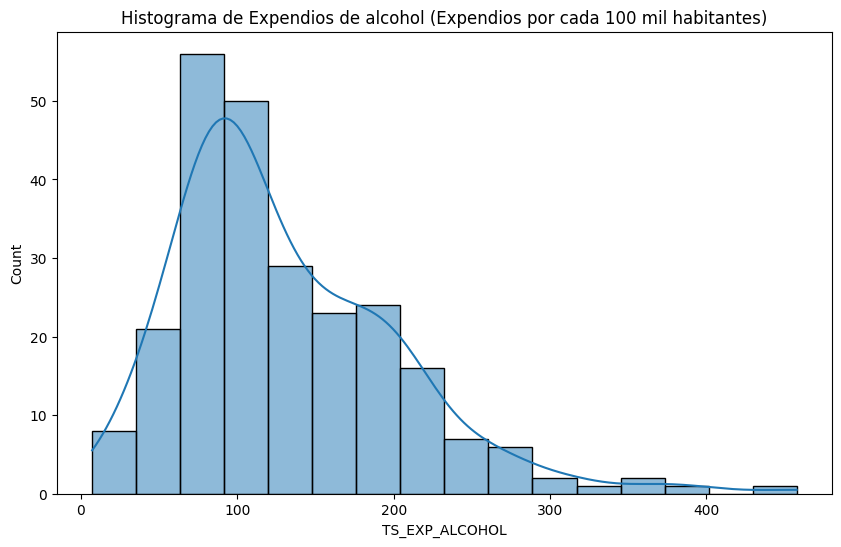

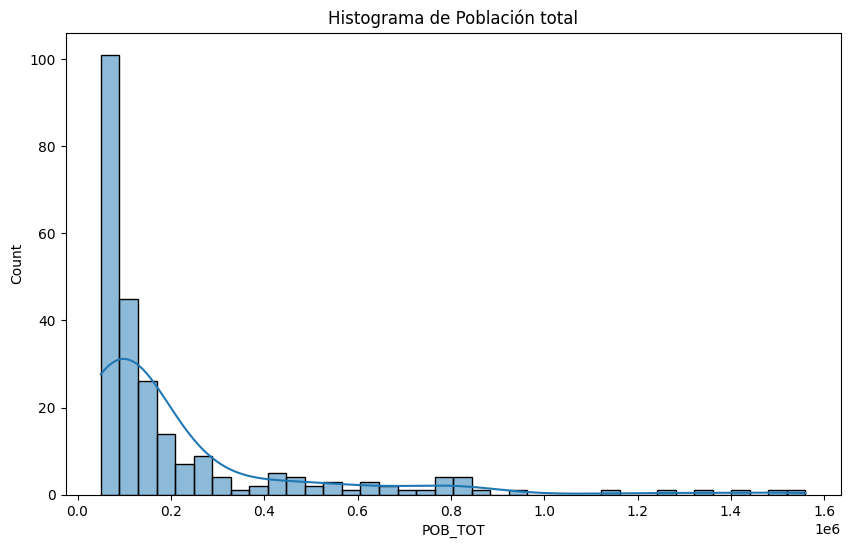

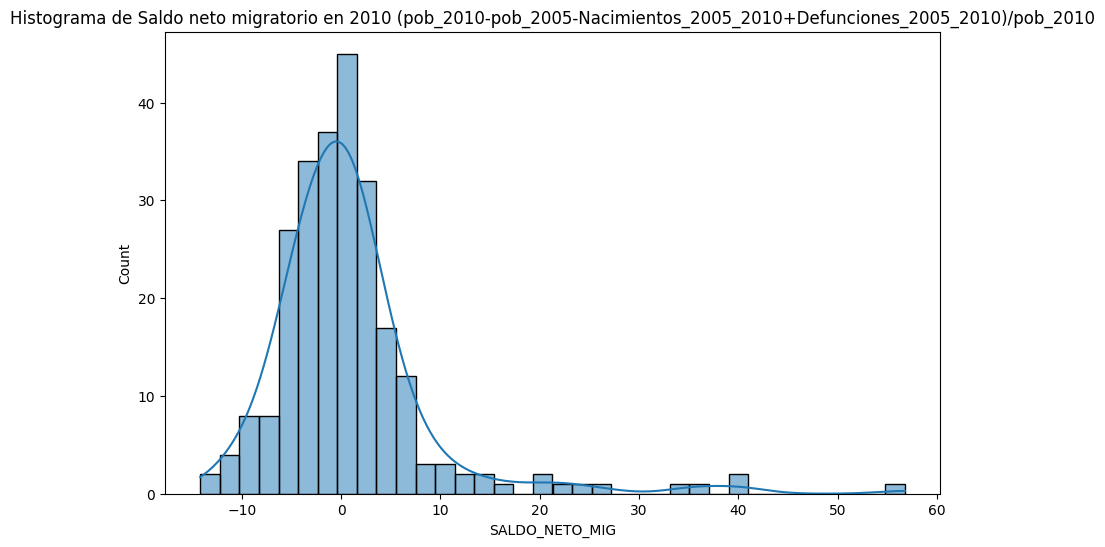

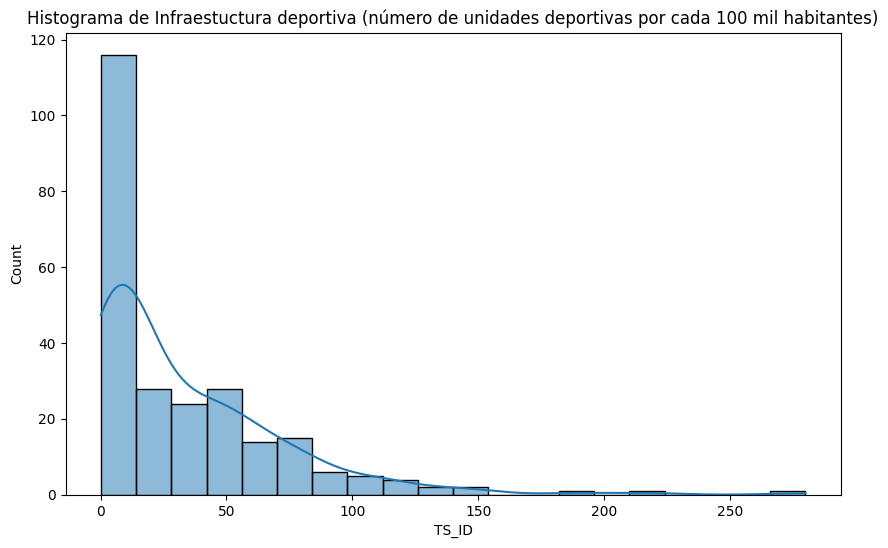

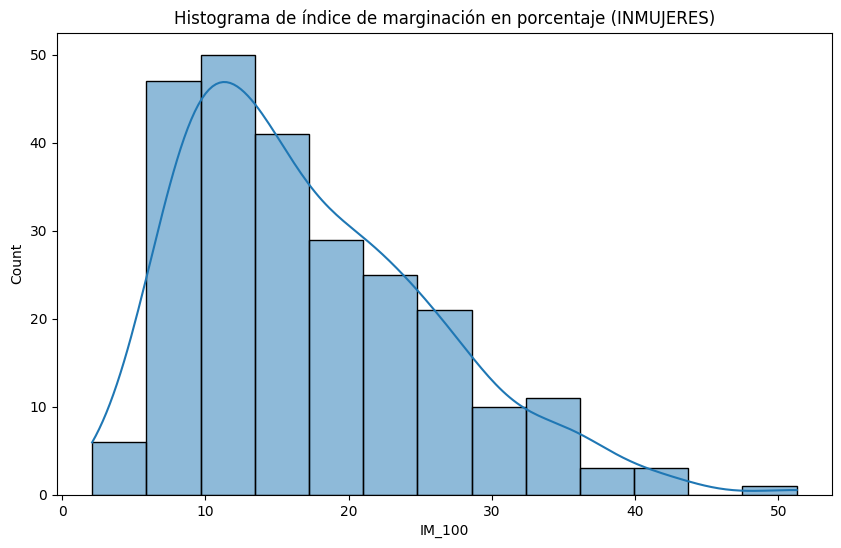

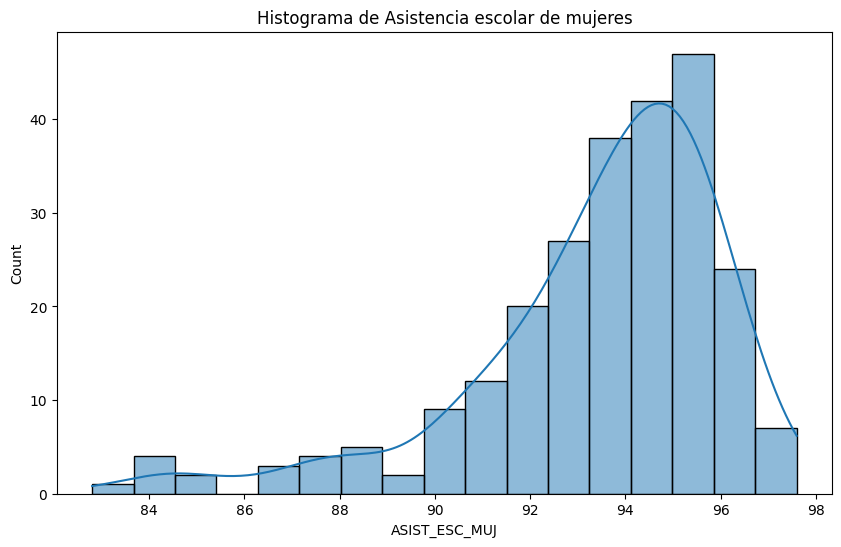

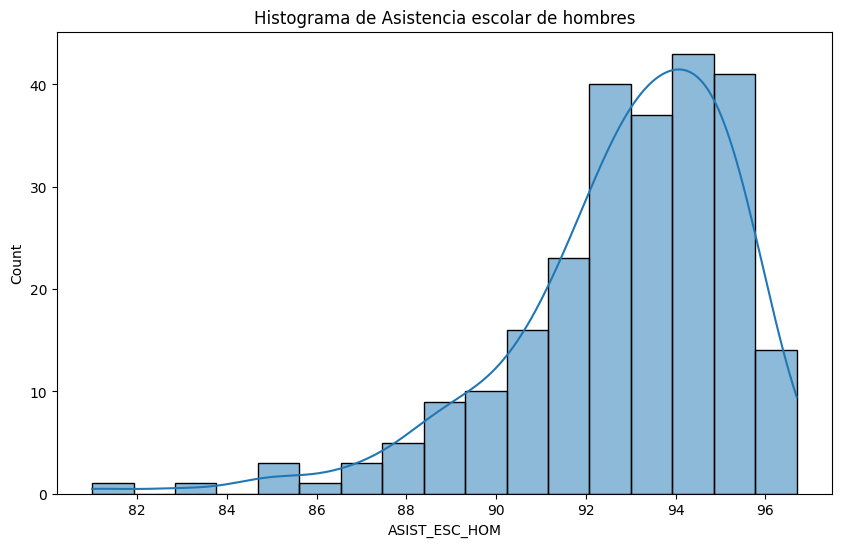

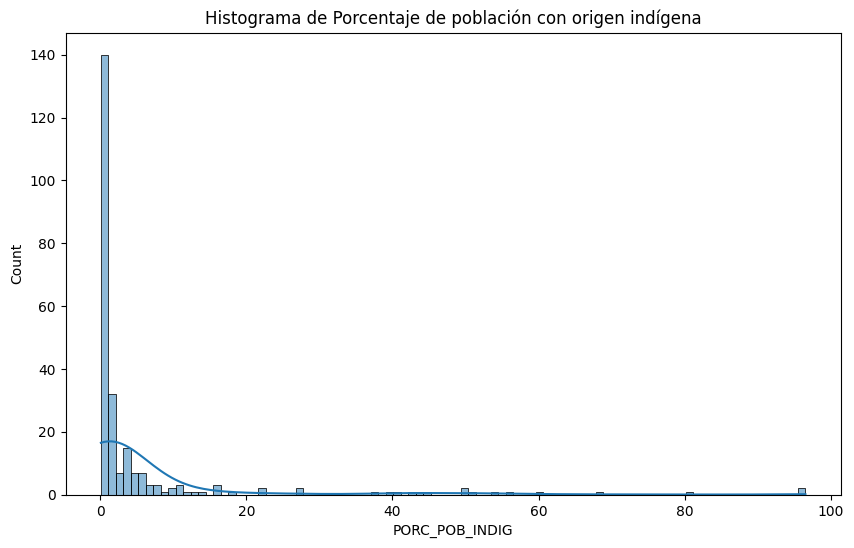

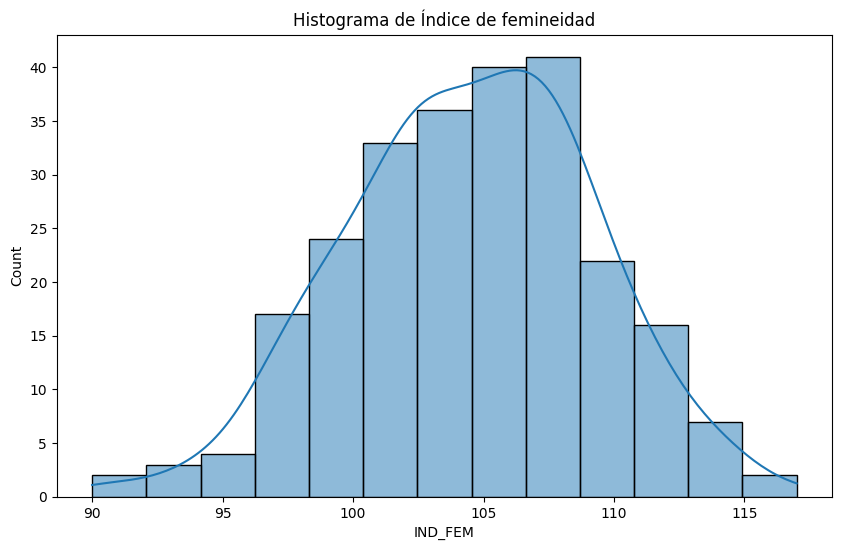

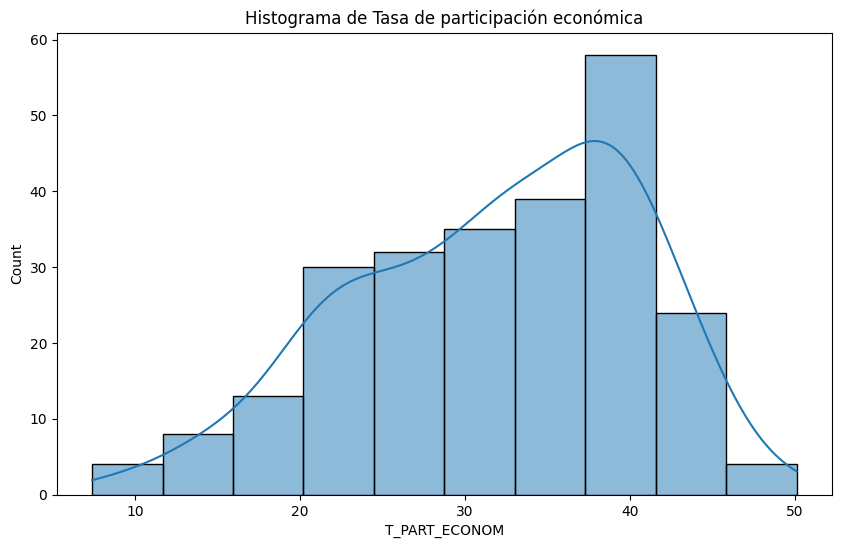

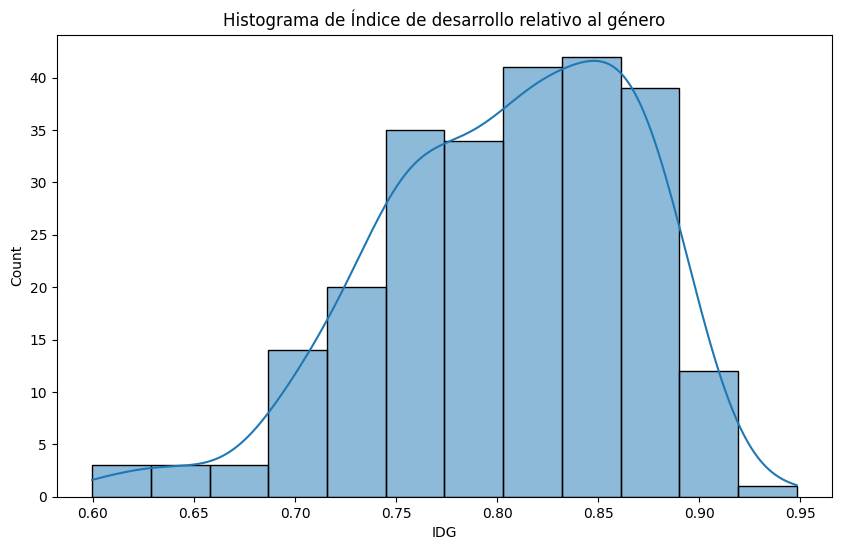

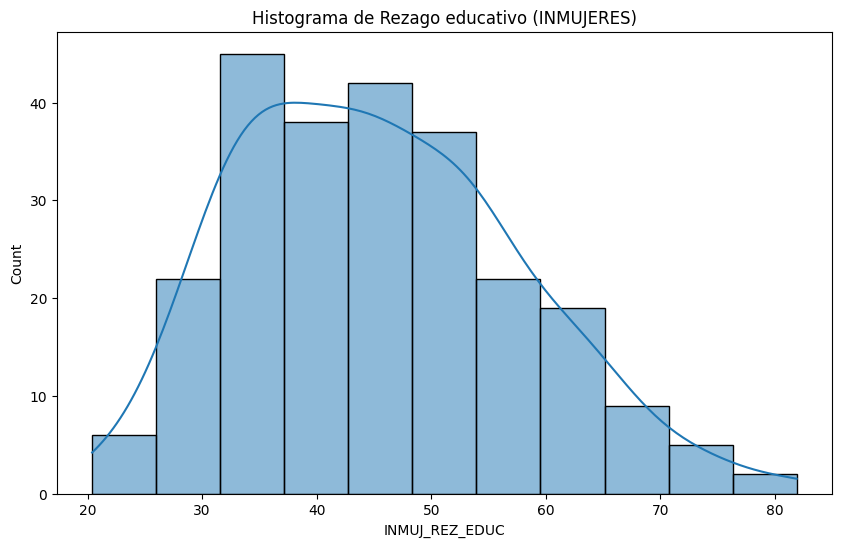

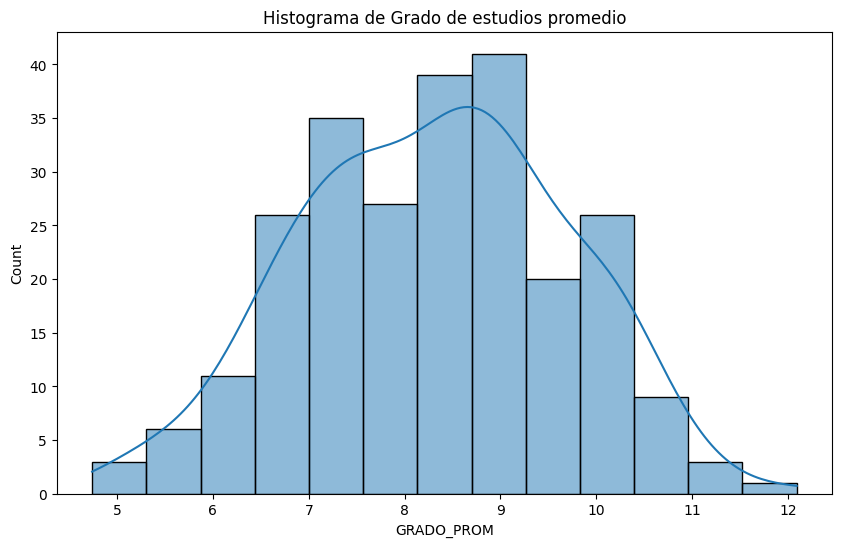

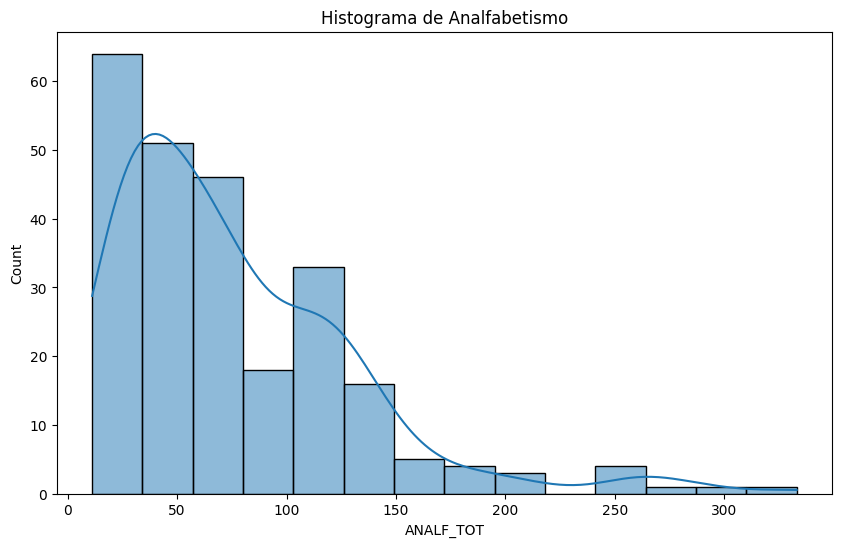

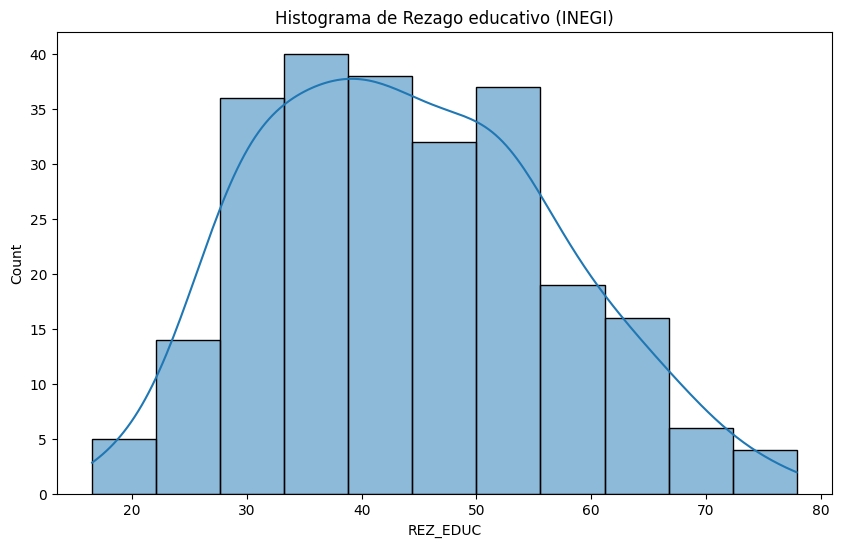

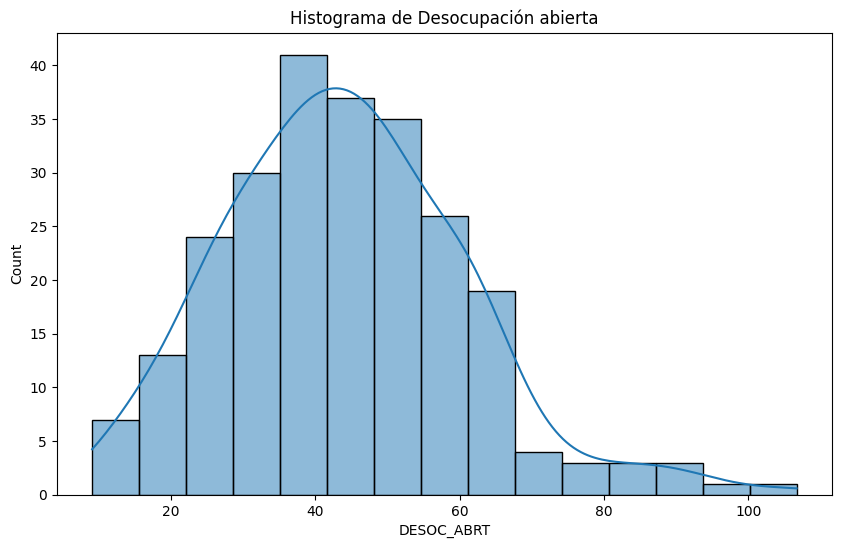

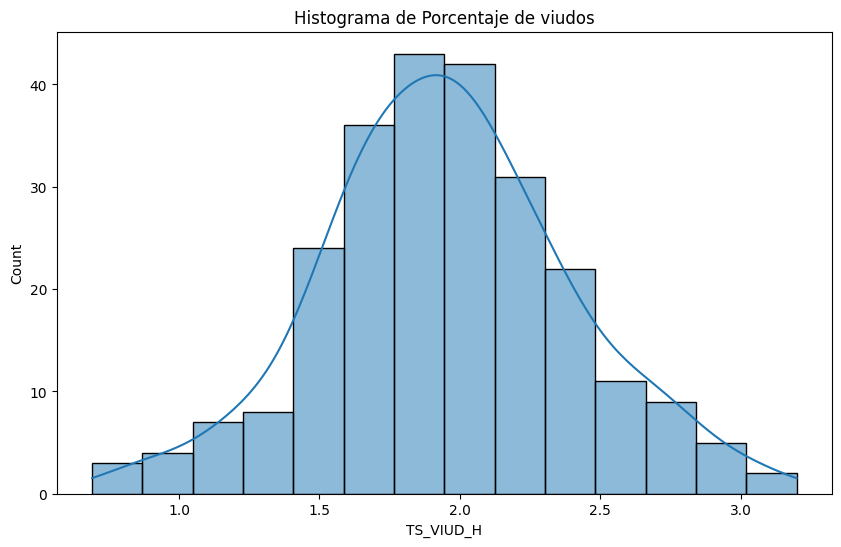

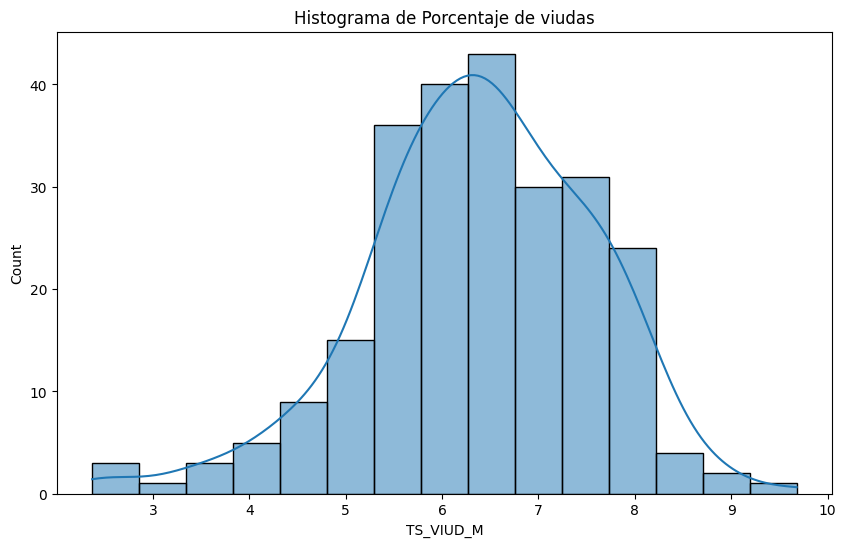

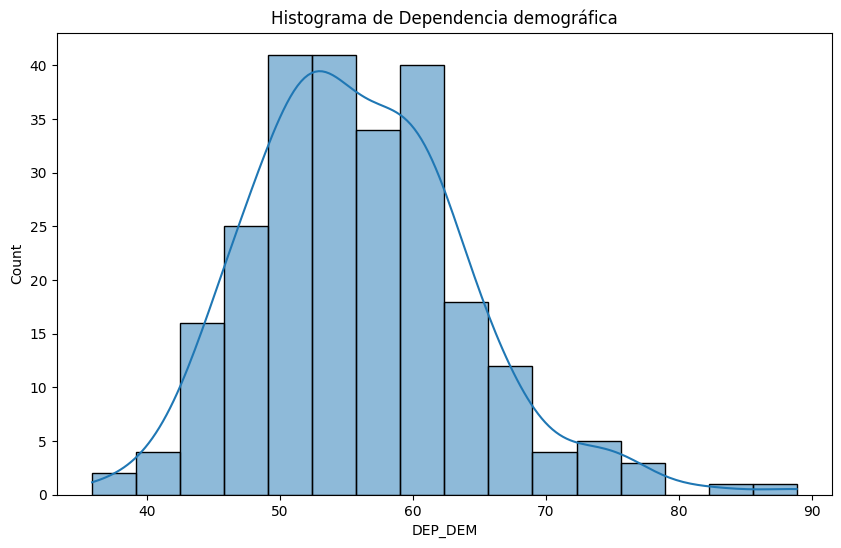

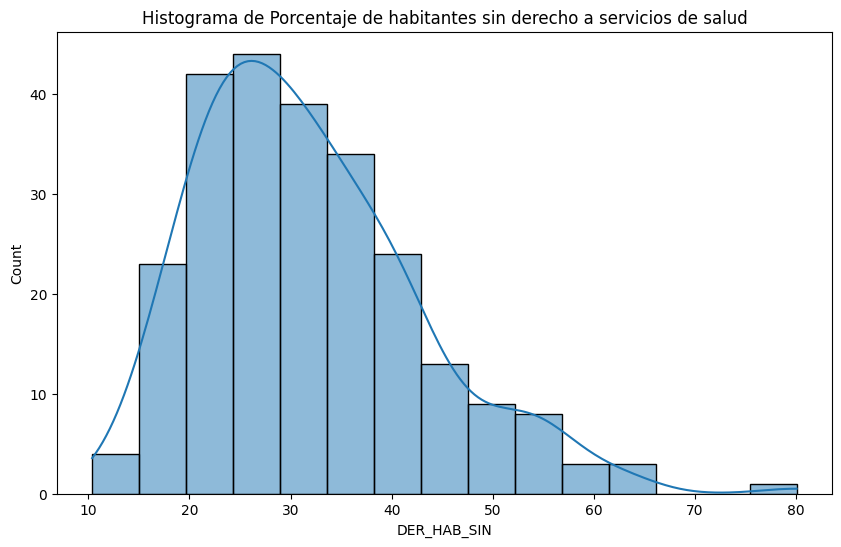

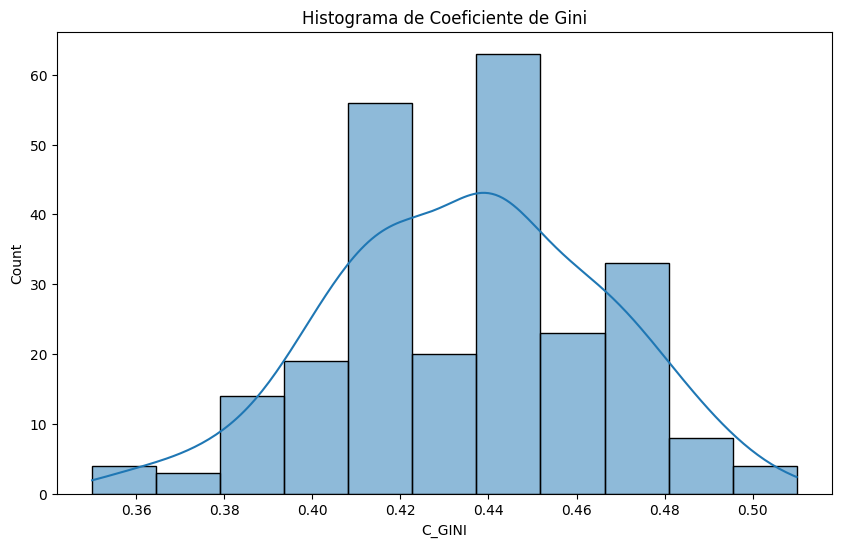

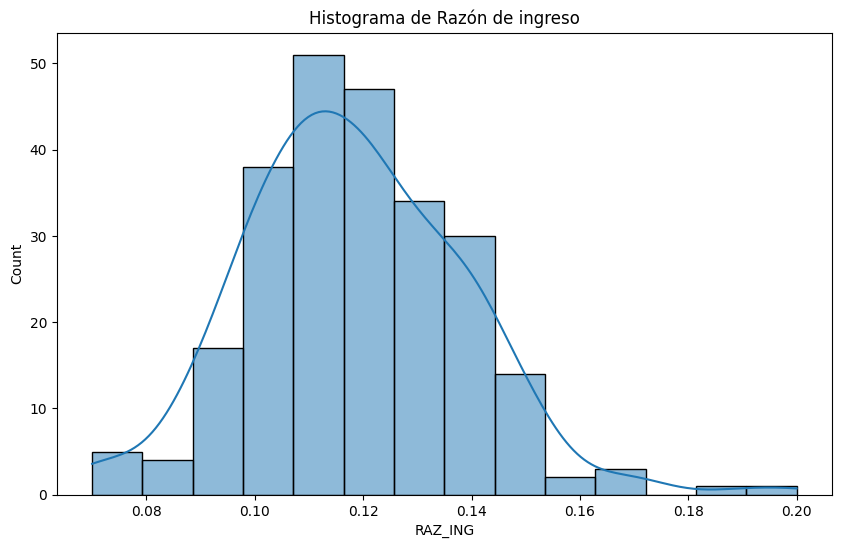

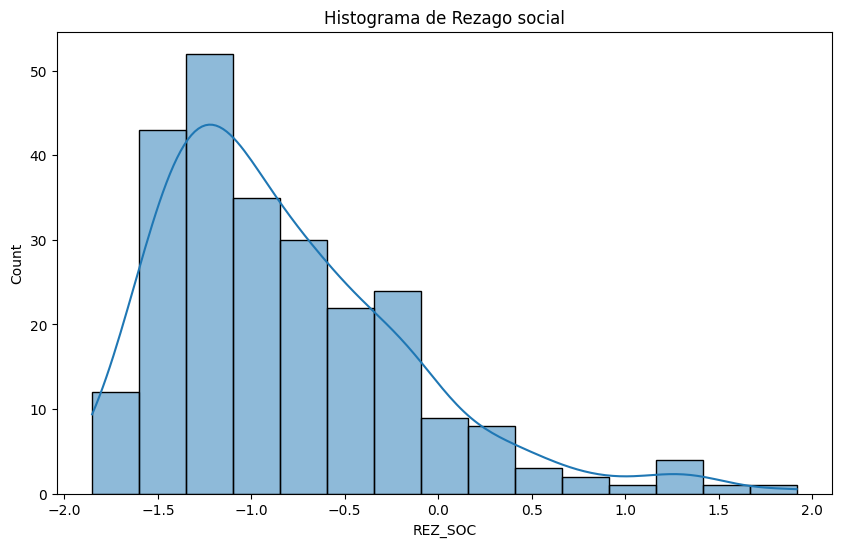

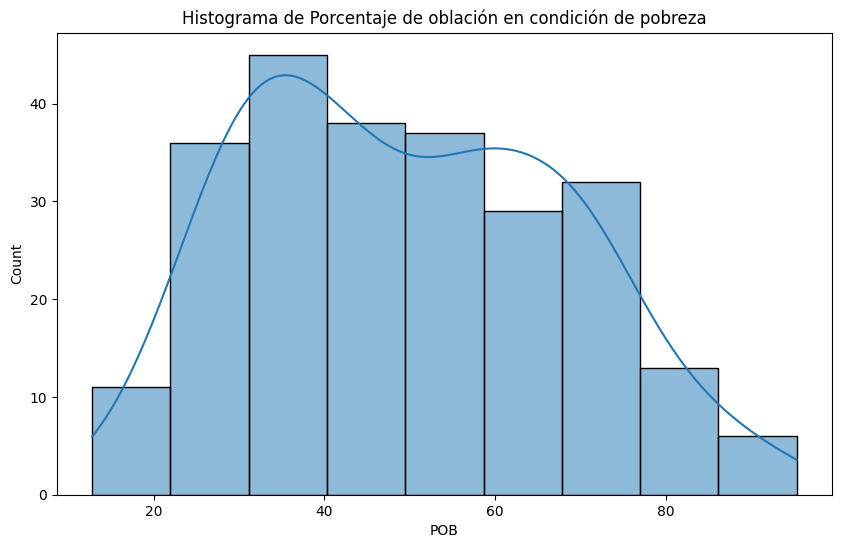

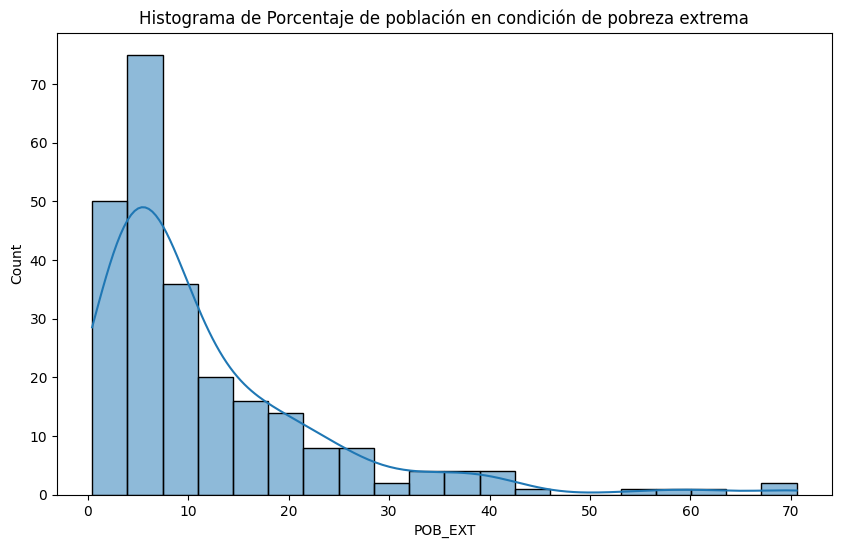

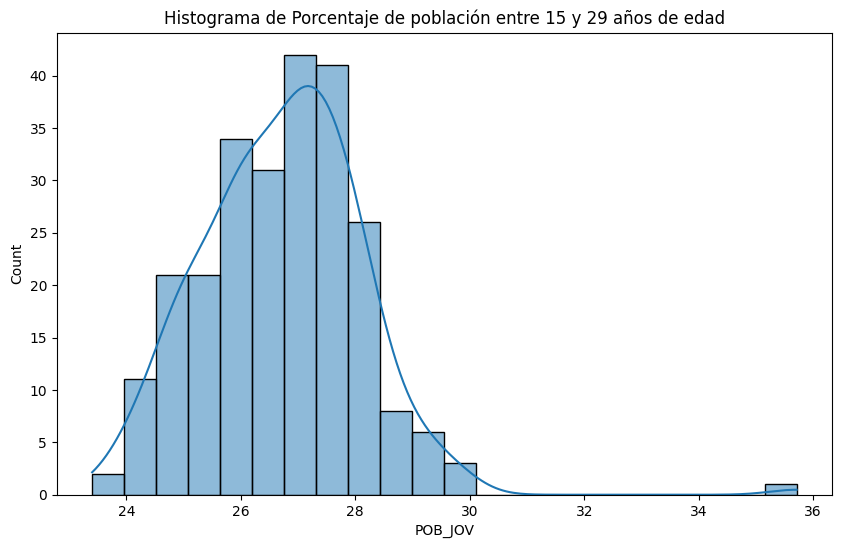

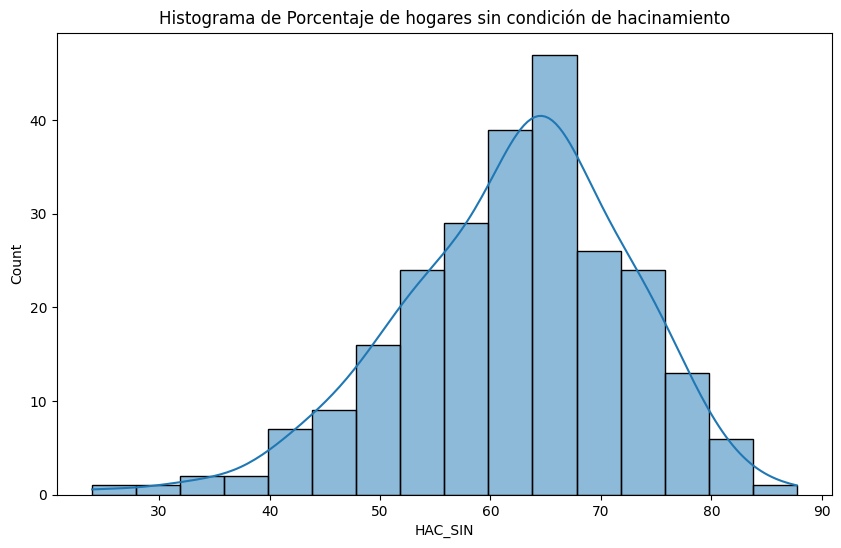

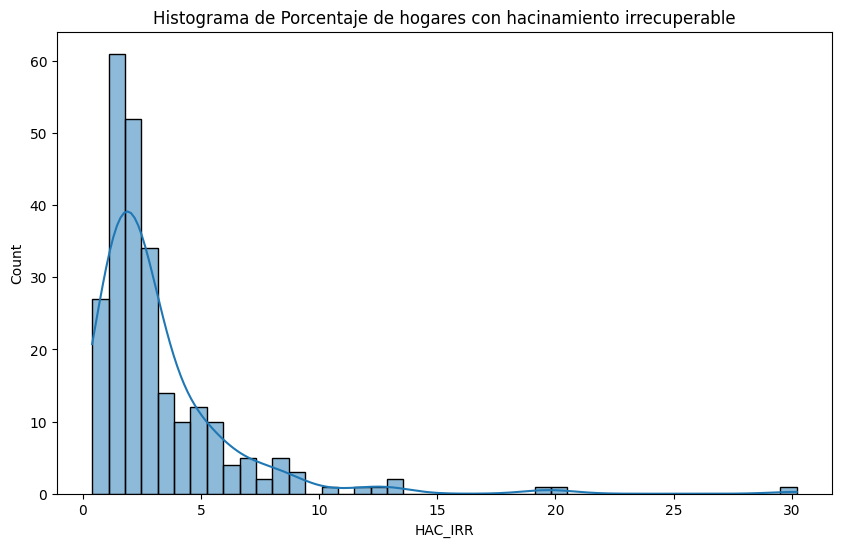

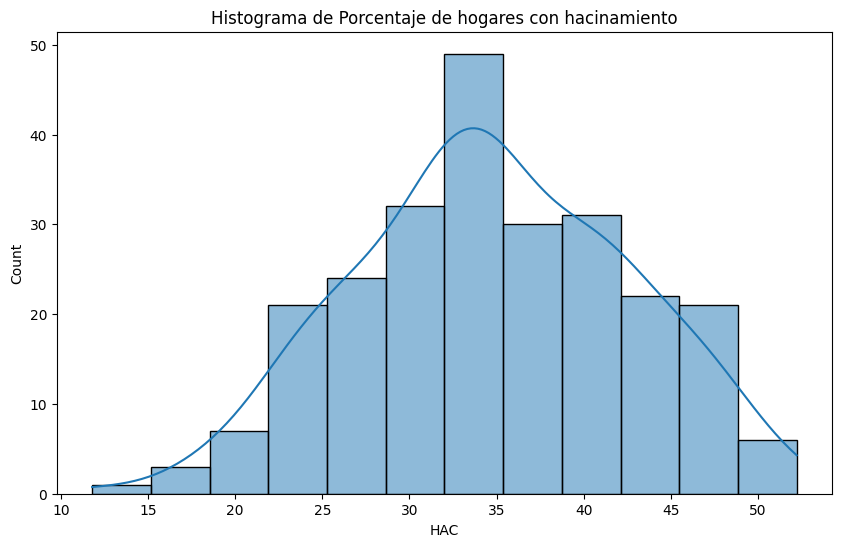

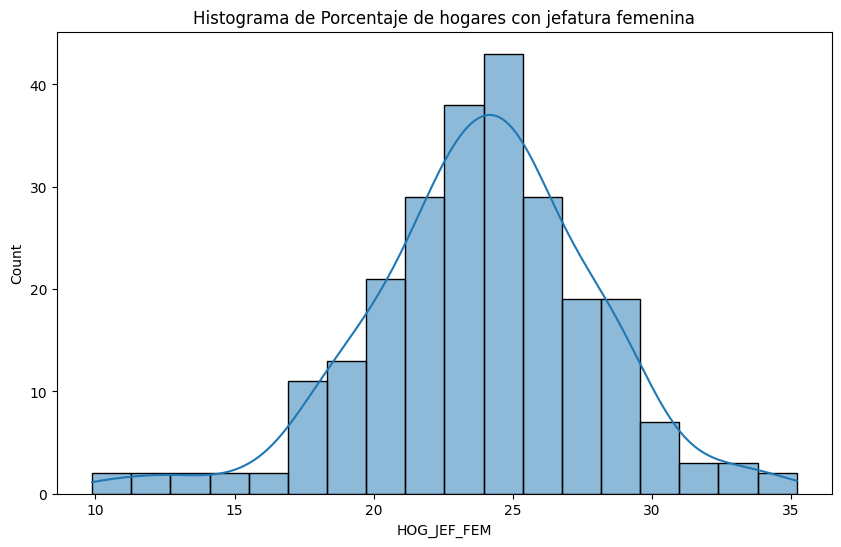

In [32]:
for columna in indicadores.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(indicadores[columna], kde=True)
    plt.title(f'Histograma de {nombres_dict[columna]}')
    plt.show()

### Grafico de Cajas

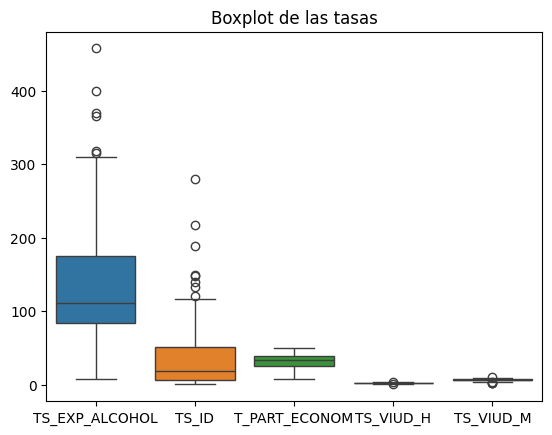

In [37]:
# Histogramas de las tasas
tasas_columns = [col for col in indicadores.columns if col.startswith('T')]
sns.boxplot(data=indicadores[tasas_columns])
plt.title('Boxplot de las tasas')
plt.show()

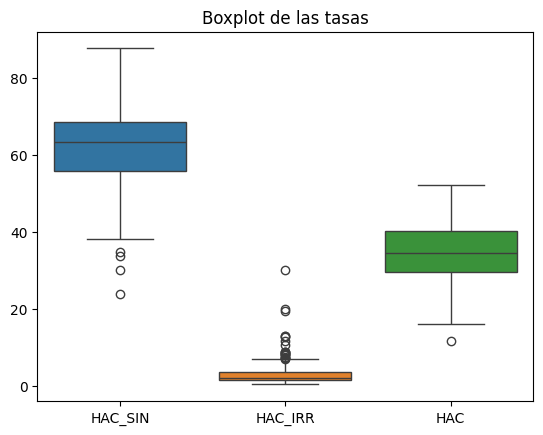

In [41]:
hac_columns = [col for col in indicadores.columns if col.startswith('HAC')]
sns.boxplot(data=indicadores[hac_columns])
plt.title('Boxplot de las tasas')
plt.show()

In [46]:
columnas_restantes = [col for col in indicadores.columns if col not in tasas_columns and col not in hac_columns]
len(columnas_restantes)

22

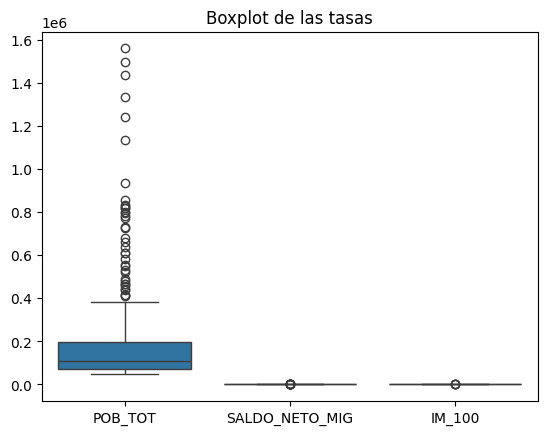

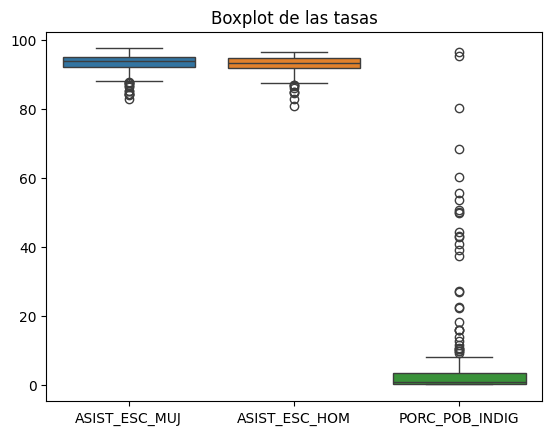

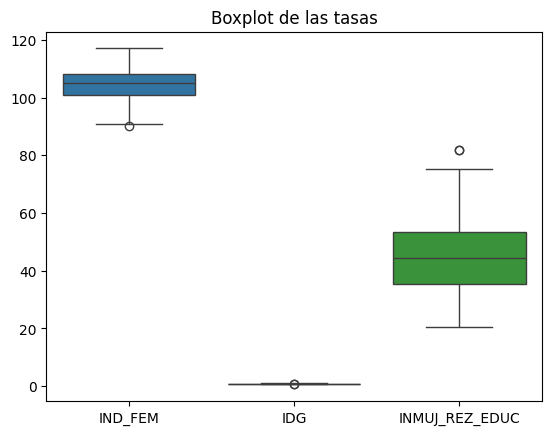

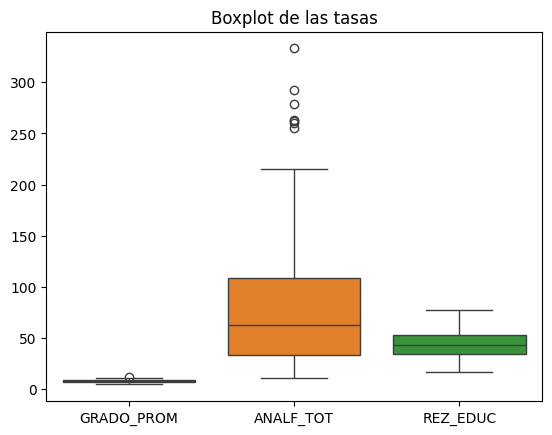

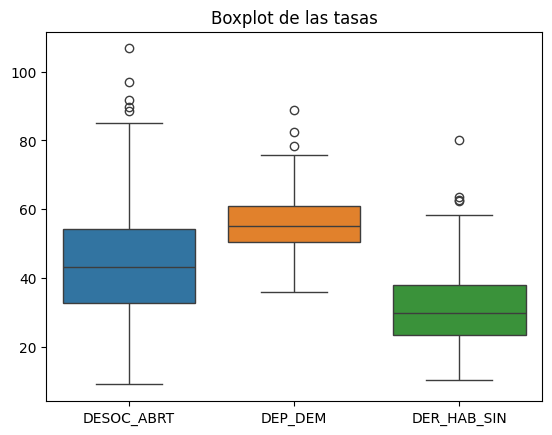

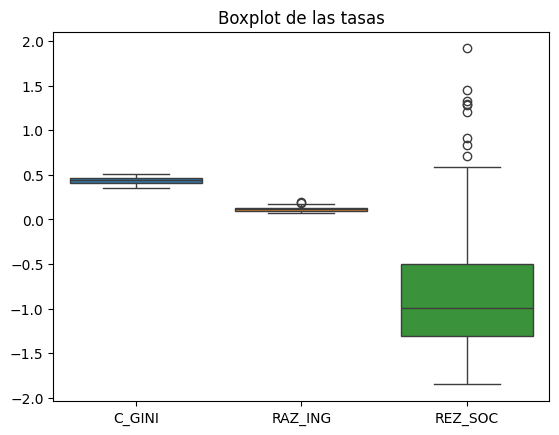

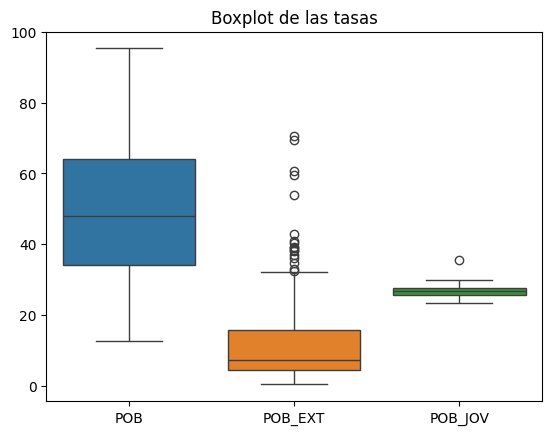

In [47]:
for columna in range(len(columnas_restantes)//3):
    sns.boxplot(data=indicadores[columnas_restantes[columna*3:columna*3+3]])
    plt.title('Boxplot de las tasas')
    plt.show()


### Hsitograma variable a predecir

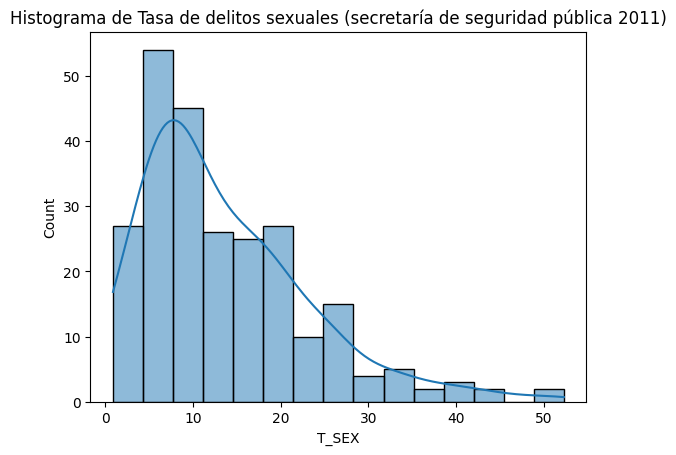

In [51]:
sns.histplot(delitos_sexuales, kde=True)
plt.title(f'Histograma de {nombres_dict["T_SEX"]}')
plt.show()

## Standarizar los datos

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(indicadores)

StandardScaler()

In [50]:
X = scaler.transform(indicadores)
X = pd.DataFrame(X, columns=indicadores.columns)
X.head()

,TS_EXP_ALCOHOL,POB_TOT,SALDO_NETO_MIG,TS_ID,IM_100,ASIST_ESC_MUJ,ASIST_ESC_HOM,PORC_POB_INDIG,IND_FEM,T_PART_ECONOM,...,C_GINI,RAZ_ING,REZ_SOC,POB,POB_EXT,POB_JOV,HAC_SIN,HAC_IRR,HAC,HOG_JEF_FEM
0,-0.470239,2.198715,-0.007671,2.028234,-1.102966,0.248467,0.338860,-0.391701,0.324202,0.984366,...,0.154974,0.577014,-1.103089,-1.028179,-0.811073,0.268052,1.358348,-0.699202,-1.492359,0.039129
1,-0.519635,-0.603711,-0.253071,2.197412,0.213681,-0.652396,-1.568795,-0.391701,0.324202,-0.601823,...,-1.808031,0.577014,-0.417028,0.634095,-0.388924,-0.464547,-0.007433,-0.388635,0.170290,-0.243114
2,-0.587314,-0.432240,0.771837,0.471034,-0.445791,-0.201965,-0.336768,-0.398472,-0.314717,0.579135,...,-0.499361,1.065105,-0.709423,-0.229662,-0.487256,-0.124609,0.077458,-0.256241,0.004282,-1.565975
3,-0.563878,0.953080,0.265398,-0.824386,-0.573527,-0.126893,0.020917,-0.032841,-1.166609,1.308551,...,0.482142,-0.399167,-0.356776,-0.727320,-0.519468,0.768192,0.893489,-0.352786,-1.025894,0.490718
4,-0.429433,2.726159,0.095783,-0.781137,-1.084702,0.736434,0.815773,-0.378159,-1.379582,1.076990,...,0.154974,0.088923,-1.087162,-1.048668,-0.778861,-0.522511,0.921378,-0.595350,-0.962263,0.380276


# Reducción de la dimensionalidad.

Aplica la técnica de análisis de componentes principales para transformar las variables originales y reducir la dimensionalidad del conjunto de datos. Justifica la elección del total de componentes principales que emplearás para la proyección.  

In [100]:
X.shape

(247, 30)

In [101]:
from sklearn.decomposition import PCA
PCA_model = PCA(X.shape[1])
PCA_model.fit(X)

PCA(n_components=30)

In [102]:
import numpy as np
porc_exp_var = np.round(PCA_model.explained_variance_ratio_*100,2)
np.cumsum(porc_exp_var)

array([ 46.33,  57.21,  66.15,  73.  ,  77.91,  81.56,  84.66,  87.38,
        89.3 ,  90.94,  92.42,  93.75,  95.  ,  95.89,  96.68,  97.3 ,
        97.85,  98.27,  98.66,  99.  ,  99.28,  99.53,  99.67,  99.78,
        99.87,  99.95,  99.98, 100.01, 100.02, 100.02])

Podemos reducir el conjunto de datos de 30 variables a solo 5 componentes del PCA conservando el 77.91% de la variancia

In [103]:
PCA_5 = PCA(n_components=5)
PCA_5.fit(X)
X_PCA = PCA_5.transform(X)
X_PCA = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_PCA.head()

,PC1,PC2,PC3,PC4,PC5
0,-4.107927,-0.681567,0.284043,0.088846,-0.913833
1,1.085659,-1.739725,-3.446803,-1.076939,-1.381748
2,-0.811018,-3.030282,-0.329343,-0.342431,-0.365667
3,-2.352113,-0.567266,1.946425,-0.350428,0.237481
4,-4.176510,-0.255513,1.213154,0.446968,-0.000454



# Modelo (primero):
utiliza regresión lineal múltiple para modelar la tasa de delitos sexuales en los municipios mexicanos usando los predictores originales. Indica claramente cuál es modelo obtenido.

In [104]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, delitos_sexuales)

LinearRegression()

In [105]:
linear_model.score(X, delitos_sexuales)

0.3857466878132213

In [106]:
yp = linear_model.predict(X)
yp[:20]

array([12.32257433,  8.70812349,  9.95109081, 22.33407159, 19.58285637,
       17.59195586, 22.67638464, 17.21802945, 20.16265197, 16.46016808,
       21.27511139, 22.09036851, 16.73852988, 17.1823799 , 22.5722477 ,
       11.69951506, 14.06904764, 13.53637214, 15.06219692, 19.14056833])


# Modelo (segundo):

utiliza regresión lineal múltiple para modelar la tasa de delitos sexuales de los municipios mexicanos usando como predictores a las proyecciones de los datos originales en las componentes principales. Indica claramente cuál es modelo obtenido.

In [107]:
pca_linear_model = LinearRegression()
pca_linear_model.fit(X_PCA, delitos_sexuales)

LinearRegression()

In [108]:
pca_linear_model.score(X_PCA, delitos_sexuales)

0.1798806665211261

In [109]:
pca_yp = pca_linear_model.predict(X_PCA)
pca_yp[:20]

array([15.01956139,  5.27426492, 13.87319879, 18.47587649, 18.18525452,
       18.07720888, 18.91980517, 16.39332869, 19.13237551, 19.51207816,
       19.82380044, 20.67608849, 17.21043265, 18.22973043, 20.52760665,
       13.37503634, 13.92679197, 16.43059413, 16.9009888 , 19.56226619])

# Comparación:

compara los dos modelos utilizando alguna métrica adecuada para evaluar su calidad predictiva.

In [110]:
#grafico de lineas
prediciones = pd.DataFrame({'yp': yp, 'pca_yp': pca_yp, 'y': delitos_sexuales})

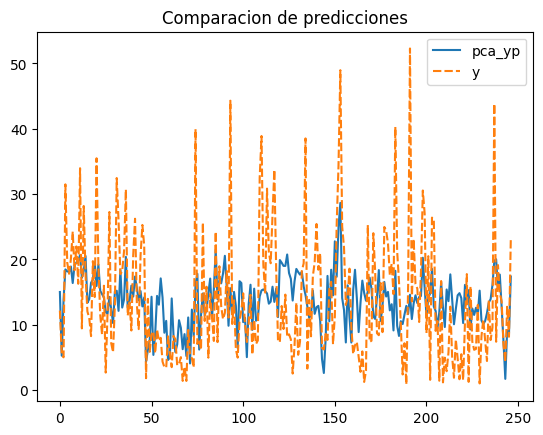

In [115]:
sns.lineplot(data=prediciones[['pca_yp','y']])
plt.title('Comparacion de predicciones')
plt.show()

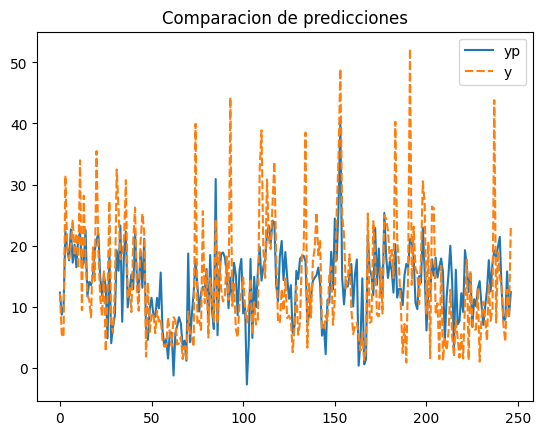

In [116]:
sns.lineplot(data=prediciones[['yp','y']])
plt.title('Comparacion de predicciones')
plt.show()

In [117]:
from sklearn.metrics import mean_absolute_error

print(f'Error absoluto medio sin PCA: {mean_absolute_error(prediciones["y"], prediciones["yp"])}')
print(f'Error absoluto medio con PCA: {mean_absolute_error(prediciones["y"], prediciones["pca_yp"])}')

Error absoluto medio sin PCA: 5.667279864751783
Error absoluto medio con PCA: 6.766049291309552


In [118]:
# score
print(f'Score sin PCA: {linear_model.score(X, delitos_sexuales)}')
print(f'Score con PCA: {pca_linear_model.score(X_PCA, delitos_sexuales)}')

Score sin PCA: 0.3857466878132213
Score con PCA: 0.1798806665211261


Vemos que el modelo sin PCA tiene un ligero mejor rendimiento, pero que necesita las 30 variables totales. En cambi con 5 componentes de PCA podemos acercarnos bastante a un rendimiento similar

# Conclusiones.

¿qué ventajas identificas con la aplicación de PCA en este problema? ¿qué desventajas?.

El Análisis de Componentes Principales (PCA) es útil en este problema porque reduce la dimensionalidad, eliminando redundancias y mejorando la eficiencia computacional sin perder demasiada información relevante. Esto facilita la visualización y puede mejorar el rendimiento de modelos de machine learning al eliminar ruido. Sin embargo, una desventaja es la pérdida de interpretabilidad, ya que las nuevas variables (componentes principales) no tienen un significado claro en términos de las variables originales. Además, si la varianza eliminada contenía información clave, se podría afectar la precisión del modelo.